In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(18,18)})
df = pd.read_csv(r'C:\Users\derek\Documents\CSE351\AB_NYC_2019.csv')
# First step is to clean the data of any duplicate rows.
df.drop_duplicates()
# Second step is to check total number of null cells in this dataframe.
# Total number of null cells is 20141
# We can also check exactly which rows contain null values. 

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


The first step when cleaning this data is to drop all duplicate rows. In the case of this dataset, there are no duplicate rows, so we can then move on to other cleaning techniques. 

created missing indicator for: name
created missing indicator for: host_name
created missing indicator for: last_review
created missing indicator for: reviews_per_month


<AxesSubplot:xlabel='index'>

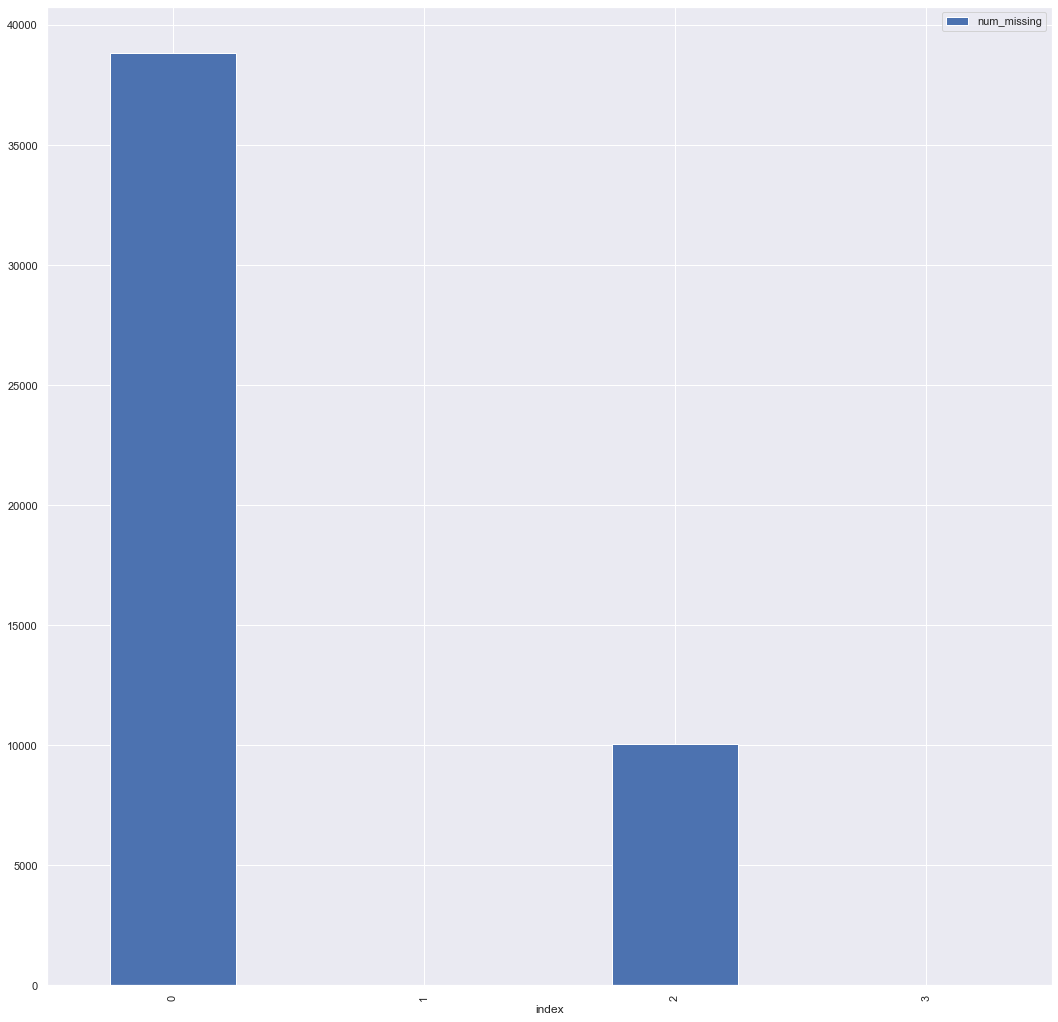

In [2]:
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Here I have created a simple bar chart to better visualize which columns contain invalid values / have no values. From this bar chart I now know that the 'reviews per month' column have missing values.

In [3]:
df['reviews_per_month'] = df['reviews_per_month'].fillna( 0 )
# Replacing the null values in "reviews_per_month" with 0 reduced total null cells from 20141 to 10089.   
print(df.isnull().sum().sum())
df.head(30)

10089


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,name_ismissing,host_name_ismissing,last_review_ismissing,reviews_per_month_ismissing,num_missing
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,False,False,False,False,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,False,False,False,False,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,NaN,0.00,1,365,False,False,True,True,2
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,False,False,False,False,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,False,False,False,False,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,74,2019-06-22,0.59,1,129,False,False,False,False,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,...,49,2017-10-05,0.40,1,0,False,False,False,False,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,...,430,2019-06-24,3.47,1,220,False,False,False,False,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,...,118,2017-07-21,0.99,1,0,False,False,False,False,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,...,160,2019-06-09,1.33,4,188,False,False,False,False,0


Replacing the null values in "reviews_per_month" with 0 reduced total null cells from 20141 to 10089.

In [4]:
# The other columns ('name', 'host_name,' 'last_review') that contain null values cannot be imputed. 
# This concludes the data cleaning portion.
# Now, let's take a look at the number of neighborhoods in this dataset. 
print(len(pd.unique(df['neighbourhood'])))
# There are 221 unique neighborhoods in this dataset. 

221


There are 221 unique neighbourhoods in this dataset. 

In [5]:
#This block of code prints a table that shows the different neighbourhoods. 
frequency = df['neighbourhood'].value_counts()
print("Frequency of value in column 'neighbourhood' :")
print(frequency)

Frequency of value in column 'neighbourhood' :
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64


Some neighbourhoods only appear once in the dataset. We need to filter these neighbourhoods out before doing our next calculations.


In [6]:
# df['neighbourhood'].value_counts()+
df2 = df
frequency = df2['neighbourhood'].value_counts()
for cell in df2['neighbourhood'].unique():
    if frequency[cell] < 5:
        df2 = df2[df2['neighbourhood'] != cell]

df2.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)
#Filtering out all neighbourhoods with less than 5 listings, the below table shows the top 5 and bottom 5 priced neighbourhoods.
#for i in range(0,221):
#    if frequency[i] < 5:
        
#df2.drop(df2[(frequency[df2.neighbourhood] < 5)])
# frequency[]
# df.groupby('neighbourhood')['price'].mean().sort_values(ascending = False)
# grouped.filter(lambda x: x['neighbourhood'].count() >= 5)
# grouped['price'].mean().sort_values(ascending = False)

# df.groupby('neighbourhood').filter(lambda x: x.value_counts() >=5)['price'].mean().sort_values(ascending = False)

neighbourhood
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Battery Park City    367.557143
Flatiron District    341.925000
                        ...    
Bronxdale             57.105263
Soundview             53.466667
Tremont               51.545455
Hunts Point           50.500000
Bull's Head           47.333333
Name: price, Length: 195, dtype: float64

As shown in the table above, the Top 5 neighbourhoods in regards to mean price are Tribeca, Sea Gate, Riverdale, Battery Park City, and Flatiron District. The Bottom 5 neighbourhoods are Bull's Head, Hunts Point, Tremont, Soundview, and Bronxdale. 

<AxesSubplot:xlabel='neighbourhood_group', ylabel='Average price'>

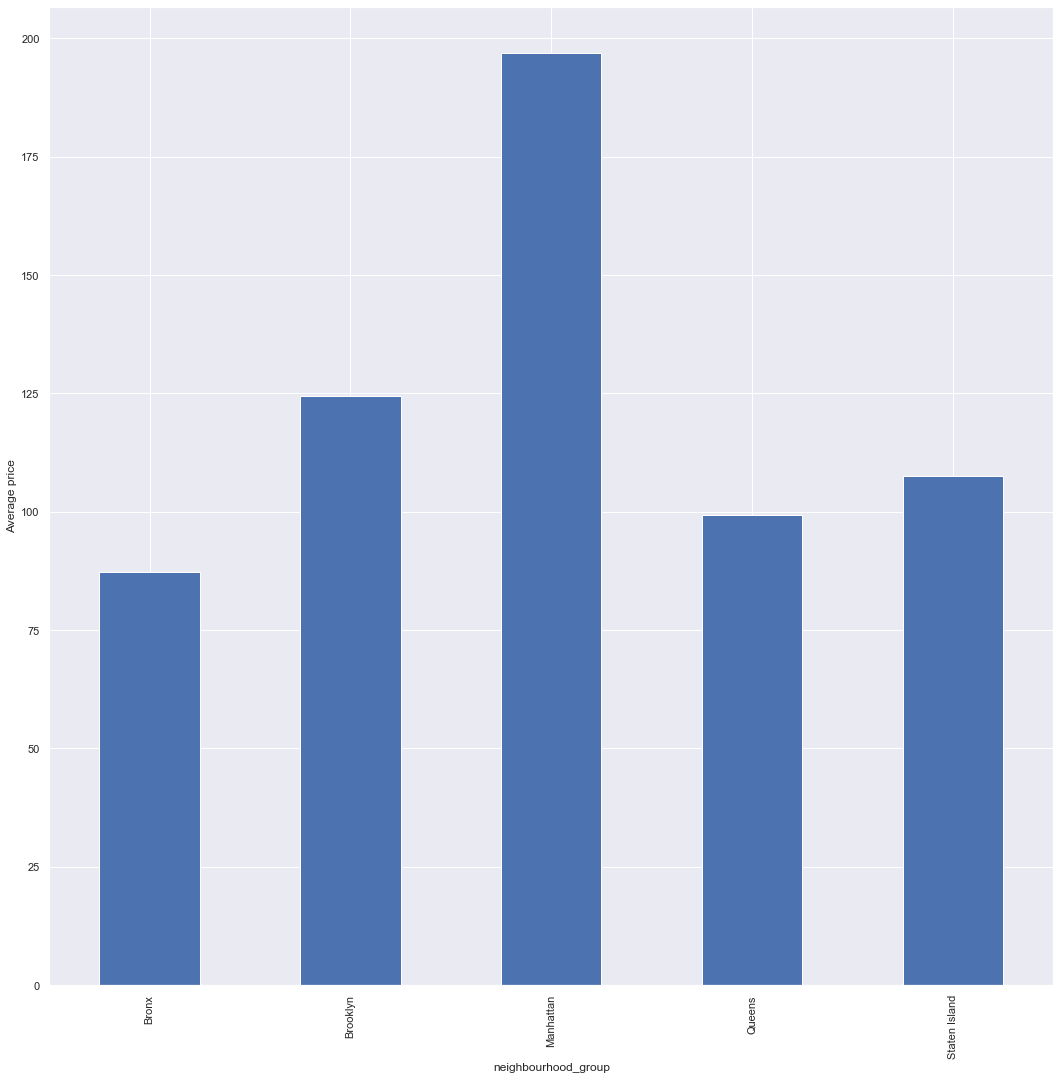

In [7]:
# Now that we have the top 5 and bottom 5 neighbourhoods based on price, we can plot the overall price variation among neighbourhood groups.
df2.groupby('neighbourhood_group')['price'].mean().plot.bar(ylabel = 'Average price')
# As you can see from this graph, Manhattan has by far the largest mean price for an Airbnb.


When grouping by neighbourhood group and creating a simple bar graph, one can see that Manhattan has by far the highest mean price for AirBnbs.

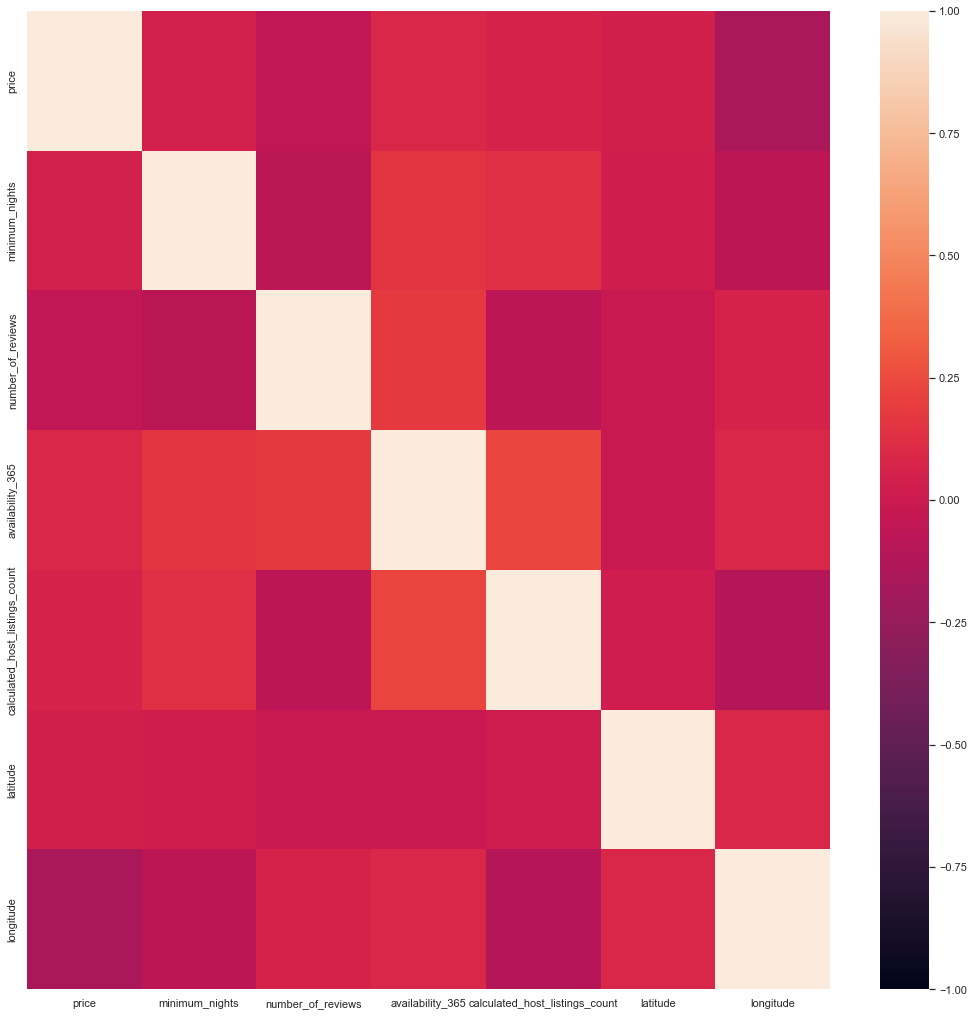

In [8]:
# Now, heatmap and correlation coefficient of all interesting data sets.
# As you can see below, there are no strong correlations between any of the data points. 
dataplot=sns.heatmap(df[['price', 'minimum_nights', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count', 'latitude', 'longitude']].corr(method='pearson'), vmin = -1)

# This heatmap shows the Pearson correlation of specific variables. Observe how there are no strong correlations whatsover in the heatmap. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

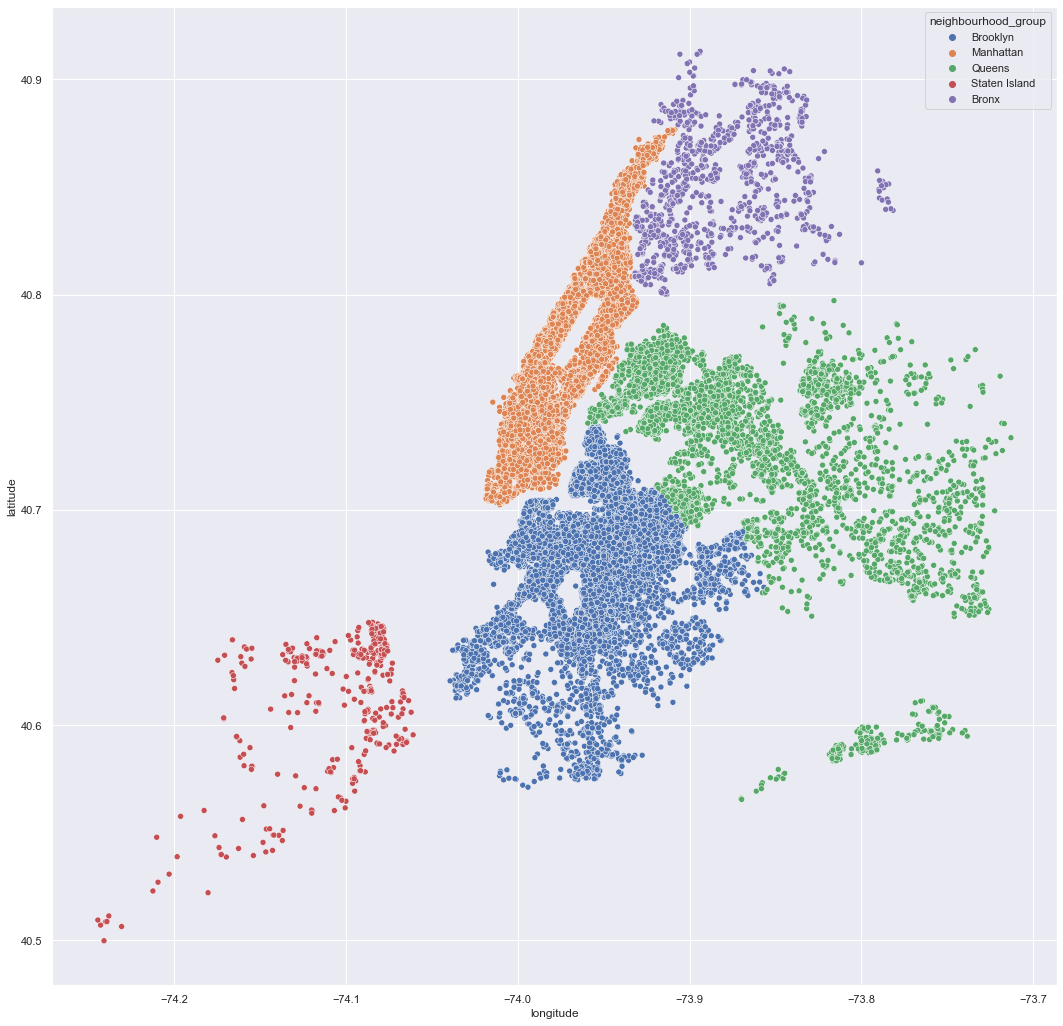

In [9]:
sns.scatterplot(x = 'longitude', y = 'latitude', data = df, hue = 'neighbourhood_group')
# The below scatterplot shows a color-coded grid of AirBnb listings in the NYC area based on borough.

By creating a color-coded scatter plot of all AirBnb locations in the dataset, one can see the distribution of AirBnbs in each borough.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

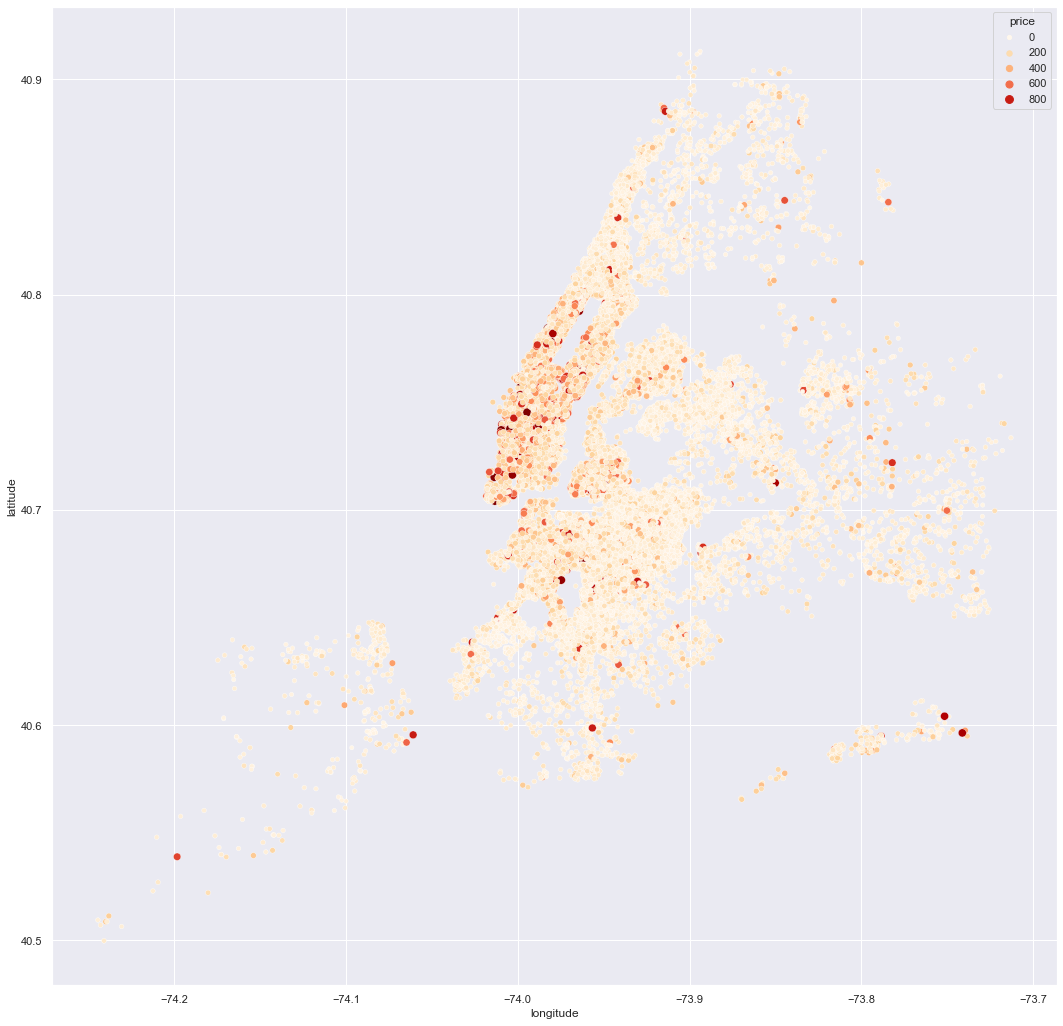

In [10]:
df3 = df[df['price'] < 1000]
sns.scatterplot(x = 'longitude', y = 'latitude', data = df3, hue = 'price', palette = 'OrRd', size = 'price', hue_norm = (0, 999))
# Below is the scatterplot of all AirBnb locations, color coded to price to identify where the priciest locations are. 
# The priciest locations are in Manhattan.

This scatterplot again plots the locations of all AirBnbs in the dataset, but instead of coloring by borough, it is colored according to the price of the room. Observing the graph, Manhattan has the densest clusters of highly priced rooms compared to other boroughs.

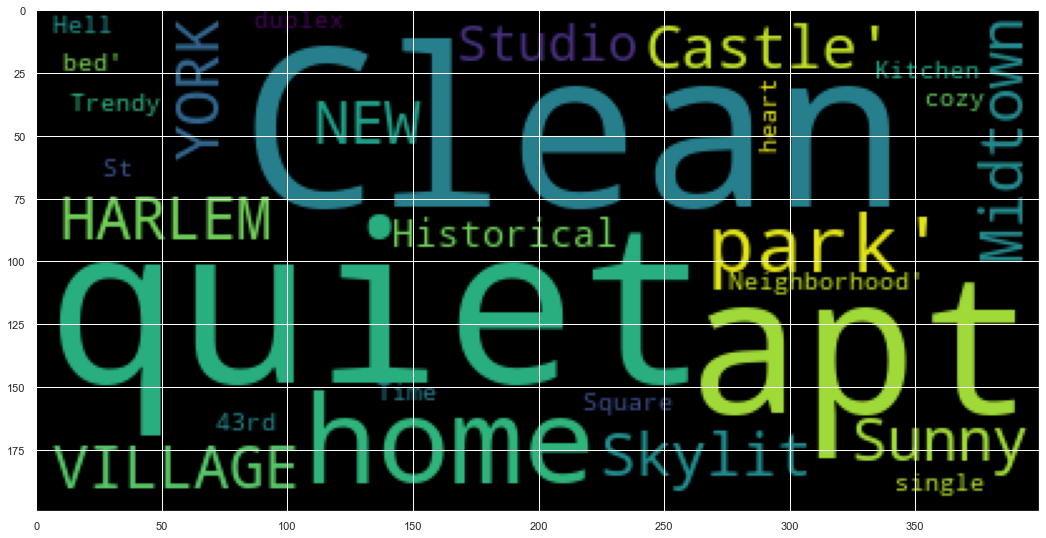

In [11]:
# Now, we create a word cloud based on the words found in the Airbnb listings. 
from wordcloud import WordCloud
import matplotlib as mpl
words = df['name'].values
wordcloud = WordCloud().generate(str(words))
mpl.pyplot.imshow(wordcloud)
# As you can see from this word cloud, the most common words found in an Airbnb name include 'Clean' and 'quiet', which are definitely desirable attributes for a property to have.

This word cloud contains the most frequently used words in the description of each AirBnb. By far the most frequent words include Clean and Quiet.

<AxesSubplot:xlabel='neighbourhood_group', ylabel='# Host listings'>

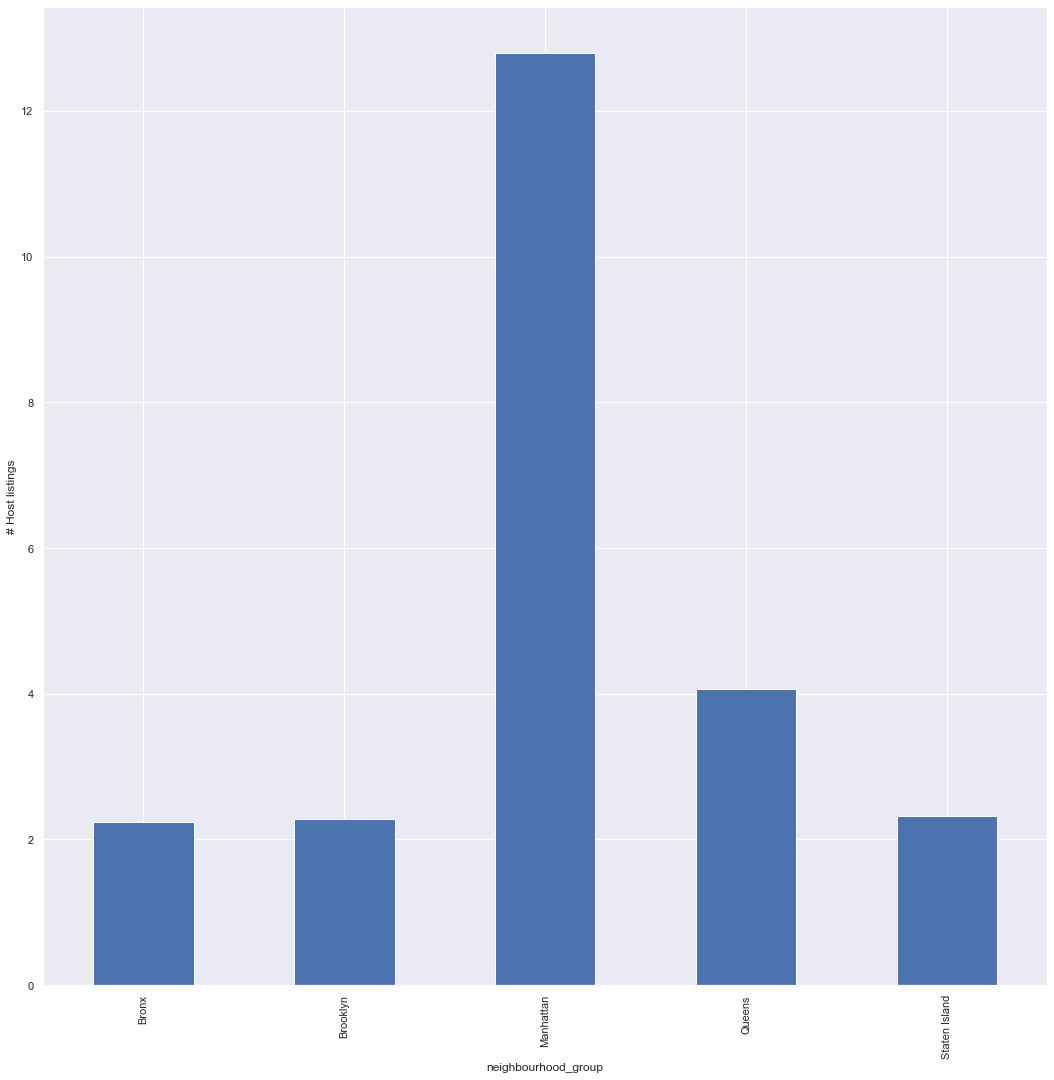

In [12]:
df.groupby('neighbourhood_group')['calculated_host_listings_count'].mean().plot.bar(ylabel = '# Host listings')
# From this bar plot, we can see that the average # host listings is highest in Manhattan and around the same for the Bronx, Brooklyn, and Staten Island.

From this bar plot, we can see that the average # host listings is highest in Manhattan and around the same for the Bronx, Brooklyn, and Staten Island.

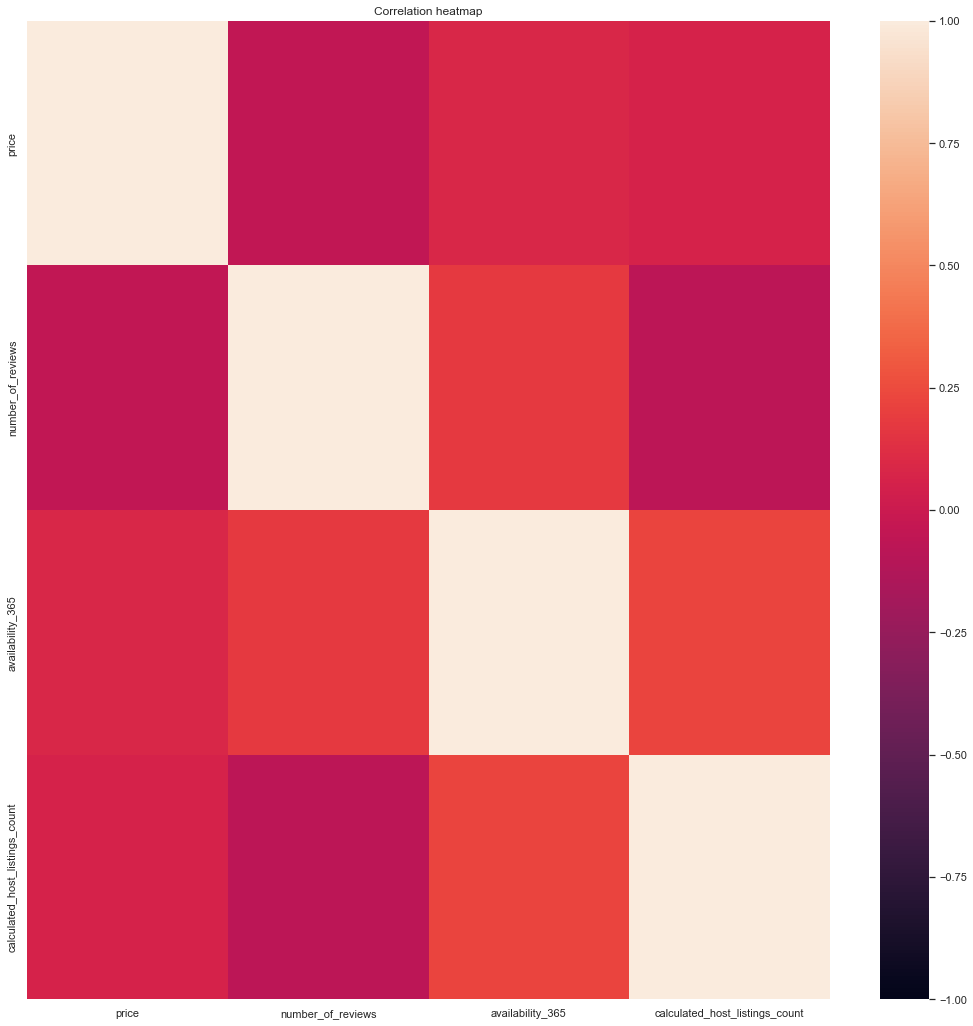

In [13]:
dataplot=sns.heatmap(df[['price', 'number_of_reviews', 'availability_365', 'calculated_host_listings_count']].corr(method='pearson'), vmin = -1).set(title = "Correlation heatmap")

# This heatmap shows there is no strong correlation between calculated host listings count and any other variable. 

This correlation coefficient heatmap again shows the weak correlation among all variables. 

[Text(0.5, 1.0, 'Types of Rooms and Availability')]

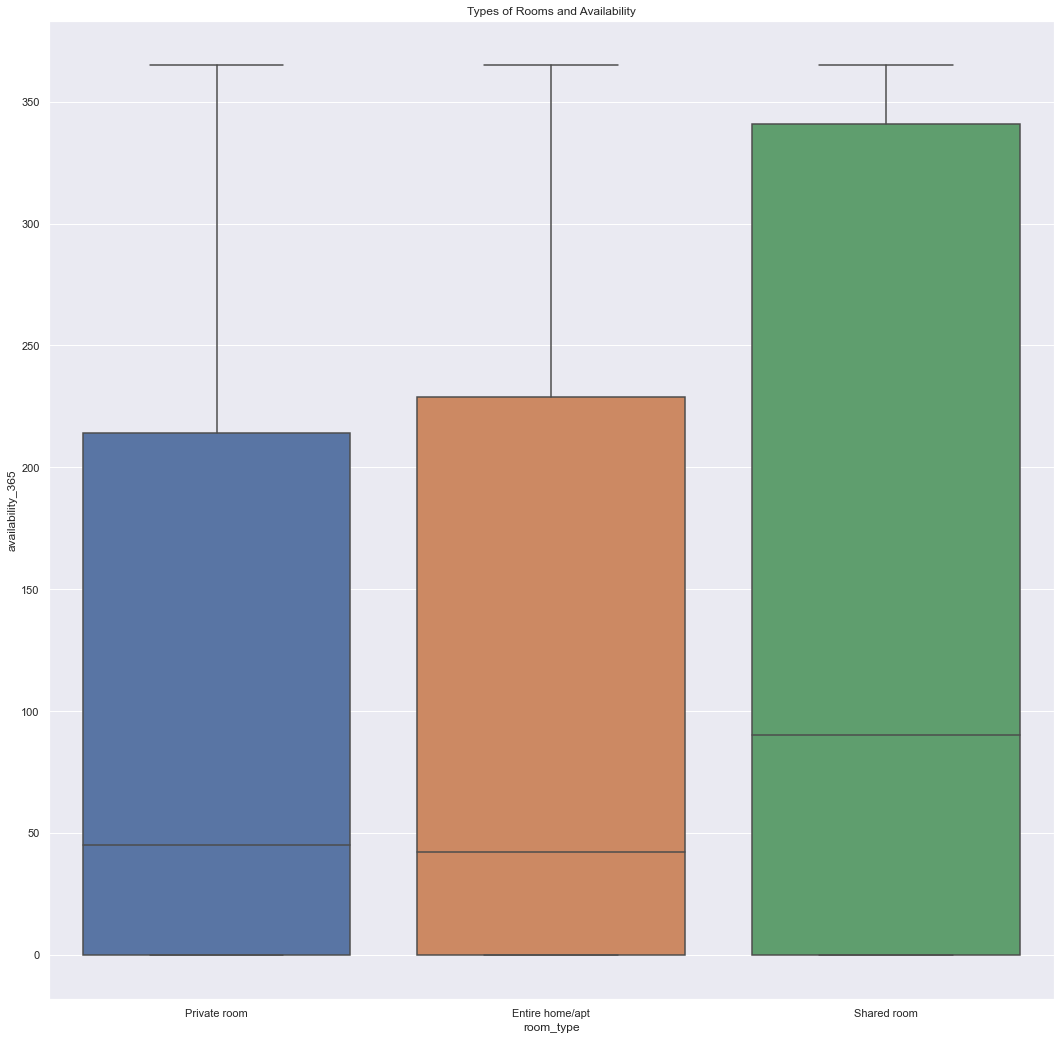

In [14]:
sns.boxplot(x='room_type', y = 'availability_365', data = df).set(title = "Types of Rooms and Availability")
# This boxplot shows how the availability of a room is dependent on the type of room. As you can see, shared rooms have a higher median and 3rd quartile of availability.

This boxplot is used to show the dependence of the availability of a room on the type of room. Shared rooms have a higher median and 3rd quartile of available days.

<AxesSubplot:title={'center':'Types of Rooms'}, ylabel='room_type'>

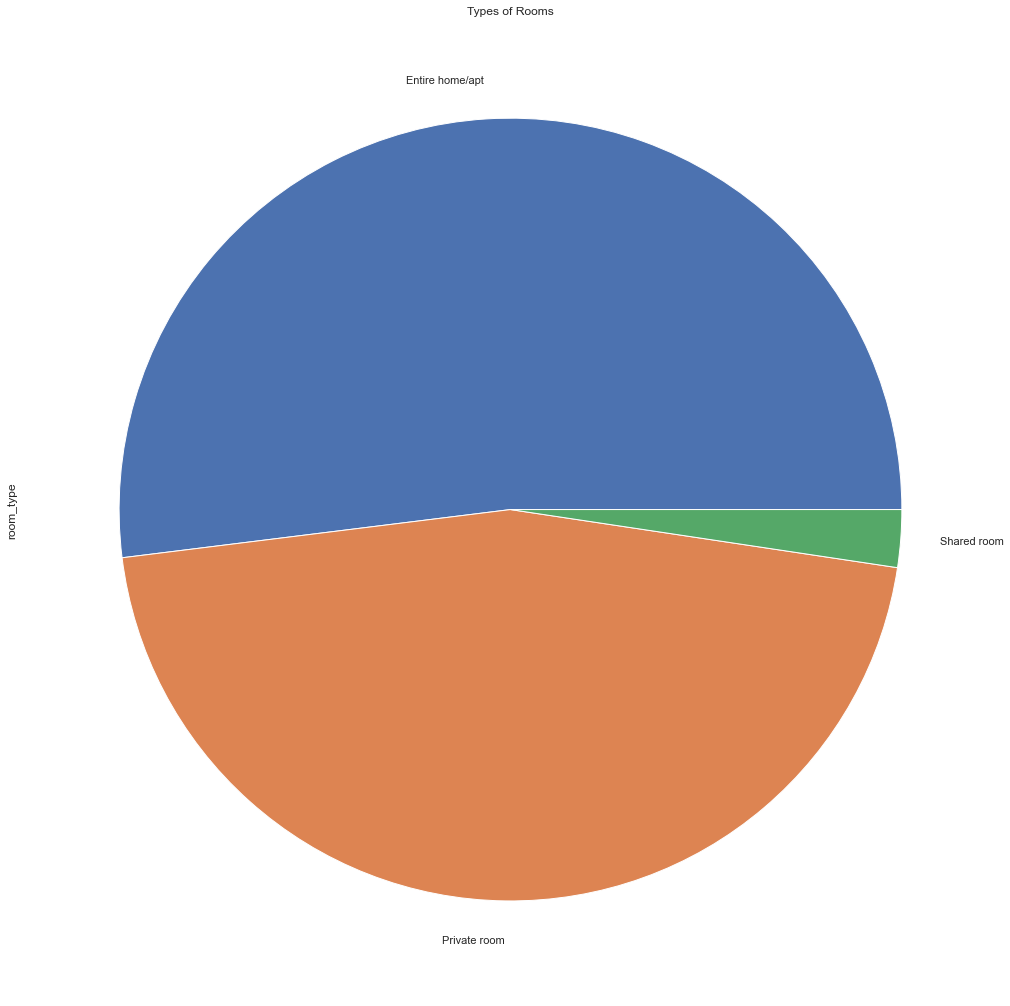

In [15]:
df['room_type'].value_counts().plot.pie(title = 'Types of Rooms')
# This pie char shows the distribution of types of rooms. Shared rooms are by far the least frequent listing. 

This pie chart shows the distrbution of frequency of types of rooms. Shared rooms are by far the least frequent listings. 
